In [216]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
%matplotlib inline

matplotlib.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 14

In [217]:
data = pd.read_csv('observables_10_broadAndCritical_100010000.tab', sep=' ')
data.head()

,time,iteration,T,E,m
0,0.000000,0,3.403778,-0.333496,0.044922
1,0.391400,1000,3.403778,-0.360840,0.035156
2,0.929678,2000,3.403778,-0.328125,0.050293
3,1.429469,3000,3.403778,-0.358398,0.004395
4,1.829813,4000,3.403778,-0.331543,0.006836


In [218]:
data['T_text'] = np.round(data['T'], 3)

Text(0, 0.5, 'Time (seconds)')

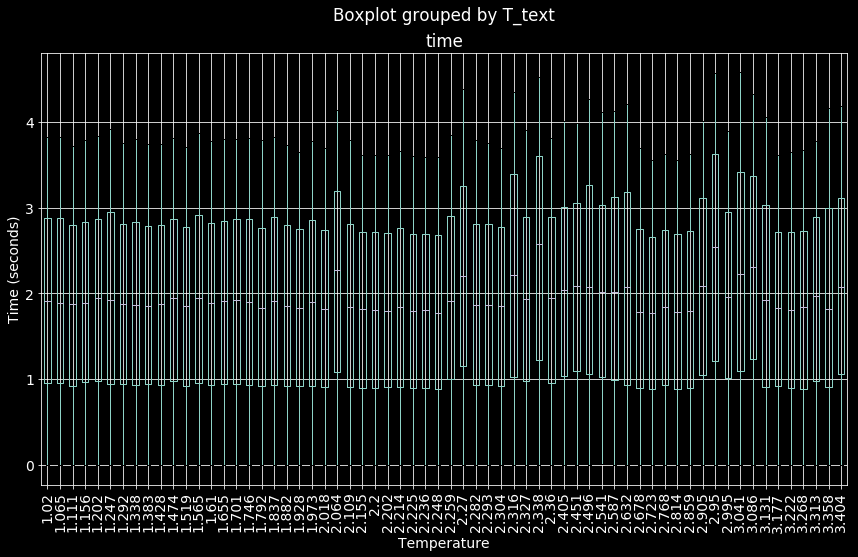

In [219]:
data.boxplot(by='T_text', column='time')
plt.xticks(rotation='vertical')
plt.xlabel('Temperature')
plt.ylabel('Time (seconds)')

In [220]:
data.groupby('T', as_index=False).agg({"E": "mean", 'E': "std"})

sumarizing = data.groupby('T')[['E', 'm']].describe()

In [208]:
sumarizing.head()

E                                                              \
         count      mean       std       min       25%       50%       75%   
T                                                                            
1.020024  10.0 -0.998682  0.000922 -1.000000 -0.999023 -0.998779 -0.998047   
1.065407  10.0 -0.996631  0.002090 -0.999023 -0.998535 -0.996582 -0.996094   
1.110791  10.0 -0.997168  0.001624 -1.000000 -0.997803 -0.997070 -0.996338   
1.156175  10.0 -0.995117  0.003498 -0.999023 -0.998535 -0.995117 -0.992798   
1.201558  10.0 -0.994189  0.002115 -0.997070 -0.996216 -0.994141 -0.992676   

                       m                                                    \
               max count      mean       std       min       25%       50%   
T                                                                            
1.020024 -0.997070  10.0  0.999316  0.000472  0.998535  0.999023  0.999268   
1.065407 -0.993164  10.0  0.998242  0.001178  0.996094  0.998047  0.998291   
1.110791 -0.994141  10.0  0.998584  0.000812  0.997070  0.998169  0.998535   
1.156175 -0.990234  10.0  0.997461  0.001881  0.994629  0.996216  0.997559   
1.201558 -0.991211  10.0  0.996973  0.001075  0.995605  0.996094  0.997070   

                              
               75%       max  
T                             
1.020024  0.999512  1.000000  
1.065407  0.999268  0.999512  
1.110791  0.998901  1.000000  
1.156175  0.999268  0.999512  
1.201558  0.997925  0.998535

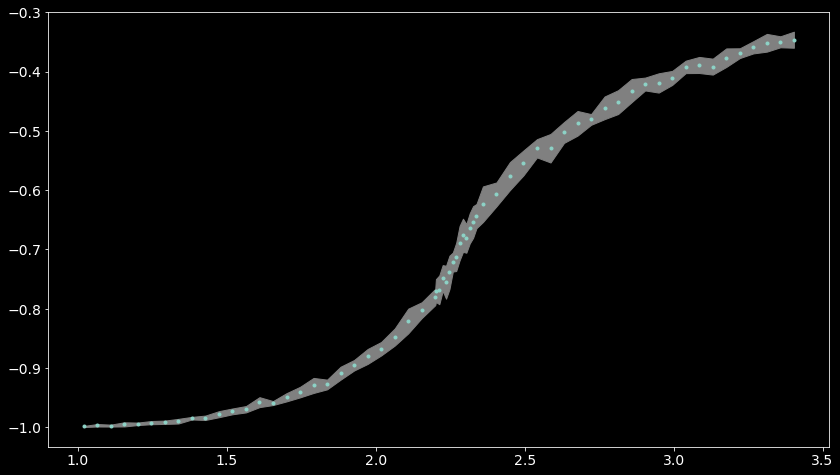

In [209]:
plt.figure(figsize=(14,8))
plt.fill_between(sumarizing.index, 
                 sumarizing['E']['mean']-sumarizing['E']['std'], 
                 sumarizing['E']['mean']+sumarizing['E']['std'],
                 color='grey')

plt.plot(sumarizing['E']['mean'], '.')

Text(0.5, 0, 'temperature')

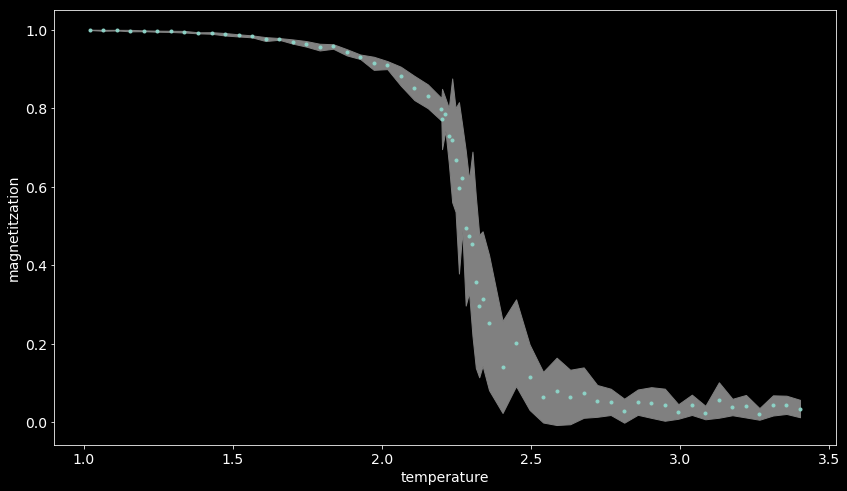

In [210]:
plt.figure(figsize=(14,8))
plt.fill_between(sumarizing.index, 
                 sumarizing['m']['mean']-sumarizing['m']['std'], 
                 sumarizing['m']['mean']+sumarizing['m']['std'],
                 color='grey')

plt.plot(sumarizing['m']['mean'], '.')
plt.ylabel('magnetitzation')
plt.xlabel('temperature')

In [211]:
susceptibility = -sumarizing['m']['mean'].diff() / sumarizing.index.to_series().diff()

In [212]:
specific_heat = sumarizing['E']['mean'].diff() / sumarizing.index.to_series().diff()

Text(0, 0.5, 'Suceptibility')

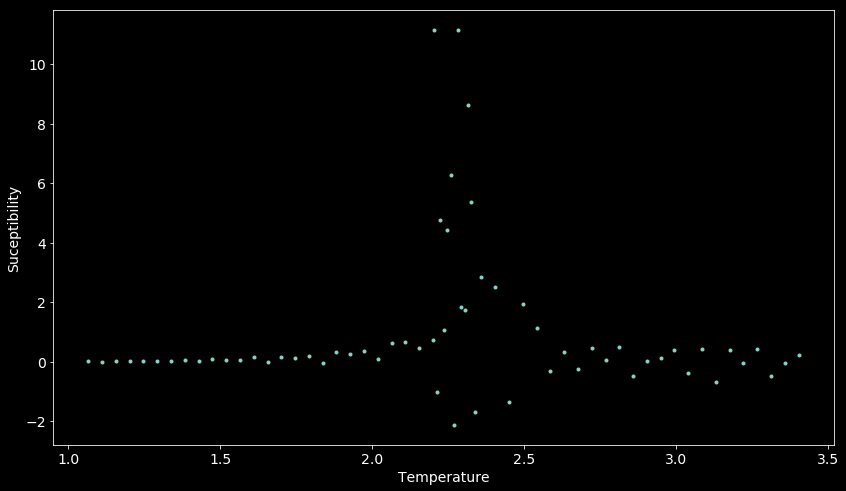

In [213]:
plt.plot(susceptibility, '.')
plt.xlabel('Temperature')
plt.ylabel('Suceptibility')

Text(0, 0.5, 'Specific Heat')

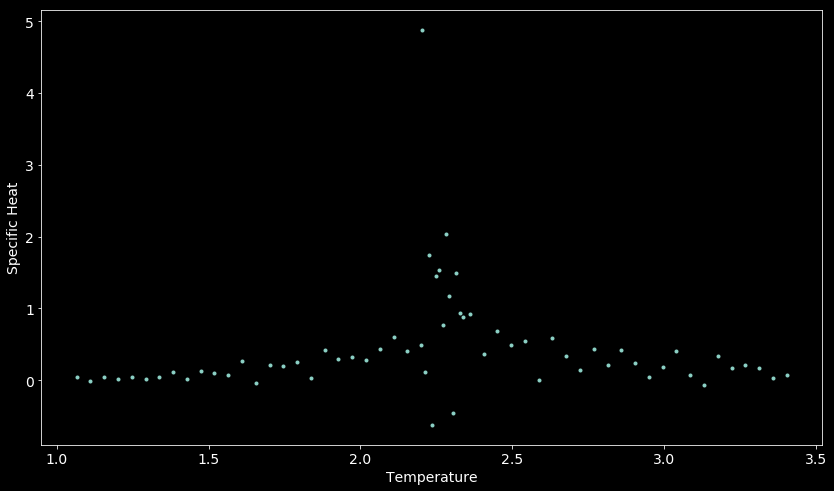

In [214]:
plt.plot(specific_heat, '.')
plt.xlabel('Temperature')
plt.ylabel('Specific Heat')

In [308]:
### SET TEMPERATURES ###
alpha_max = 1.50
alpha_min = 0.44
broad_step = 0.02
critical_step = 0.005
### DEFINE INTERVALS ###
critical_edge = 2.2
critical_max =  (TCRIT +  (TCRIT - critical_edge)) / TCRIT
critical_min =  critical_edge / TCRIT
### ALPHA VECTOR ###
alpha_vector =  np.concatenate((np.arange(alpha_max, critical_max, - broad_step),
                np.arange(critical_max, critical_min, - critical_step) , 
                np.arange(critical_min, alpha_min, - broad_step)))

In [309]:
above_data = data[data['T'] >= critical_max]
above_data.shape

(630, 6)

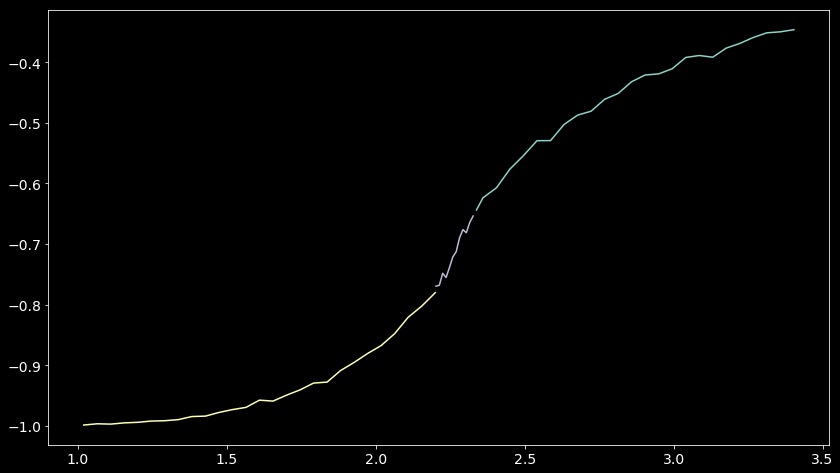

In [310]:
above_summary = sumarizing[sumarizing.index >= TCRIT * critical_max]
below_summary = sumarizing[sumarizing.index <= TCRIT * critical_min]
power_summary = sumarizing[np.logical_and(sumarizing.index < TCRIT * critical_max, 
                                          sumarizing.index > TCRIT * critical_min)]
plt.plot(above_summary['E']['mean'])
plt.plot(below_summary['E']['mean'])
plt.plot(power_summary['E']['mean'])

In [311]:
sumarizing.head()

E                                                              \
         count      mean       std       min       25%       50%       75%   
T                                                                            
1.020024  10.0 -0.998682  0.000922 -1.000000 -0.999023 -0.998779 -0.998047   
1.065407  10.0 -0.996631  0.002090 -0.999023 -0.998535 -0.996582 -0.996094   
1.110791  10.0 -0.997168  0.001624 -1.000000 -0.997803 -0.997070 -0.996338   
1.156175  10.0 -0.995117  0.003498 -0.999023 -0.998535 -0.995117 -0.992798   
1.201558  10.0 -0.994189  0.002115 -0.997070 -0.996216 -0.994141 -0.992676   

                       m                                                    \
               max count      mean       std       min       25%       50%   
T                                                                            
1.020024 -0.997070  10.0  0.999316  0.000472  0.998535  0.999023  0.999268   
1.065407 -0.993164  10.0  0.998242  0.001178  0.996094  0.998047  0.998291   
1.110791 -0.994141  10.0  0.998584  0.000812  0.997070  0.998169  0.998535   
1.156175 -0.990234  10.0  0.997461  0.001881  0.994629  0.996216  0.997559   
1.201558 -0.991211  10.0  0.996973  0.001075  0.995605  0.996094  0.997070   

                              
               75%       max  
T                             
1.020024  0.999512  1.000000  
1.065407  0.999268  0.999512  
1.110791  0.998901  1.000000  
1.156175  0.999268  0.999512  
1.201558  0.997925  0.998535

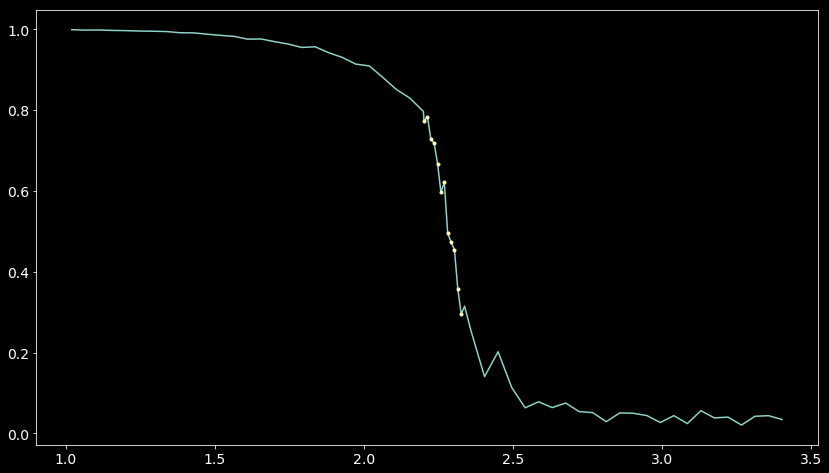

In [312]:
plt.plot(sumarizing['m']['mean'])
plt.plot(power_summary['m']['mean'], '.')

## POWER LAW FITTING

In [313]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

In [314]:

# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = np.linspace(1.1, 10.1, num_points)
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)

ydata += np.random.randn(num_points) * yerr       # simulated noisy data

In [315]:
xdata, ydata = zip(*pd.Series(power_summary[power_summary.index > TCRIT]['m']['mean']).items())
yerr = power_summary[power_summary.index > TCRIT]['m']['std'].values
yerr

array([0.13410328, 0.19801954, 0.14414716, 0.23476945, 0.2187004 ,
       0.18163602])

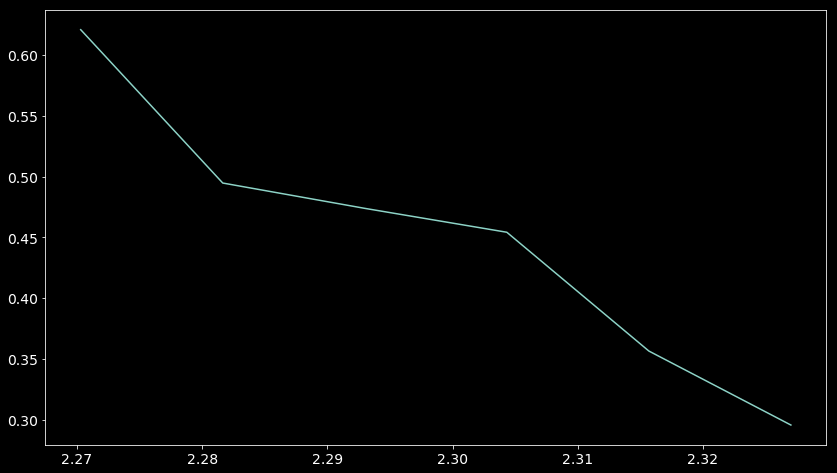

In [316]:
plt.plot(xdata, ydata)

[  9.50765694 -27.29288295]
[[ 257.27571995 -716.71816799]
 [-716.71816799 1996.79525584]]
Ampli = 3218525419.93 +/- 51624557797.95
Index = -27.29 +/- 44.69


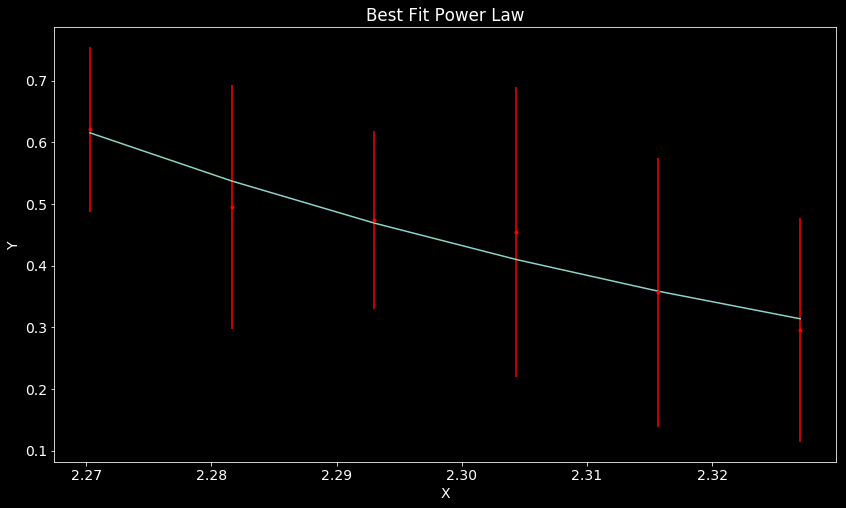

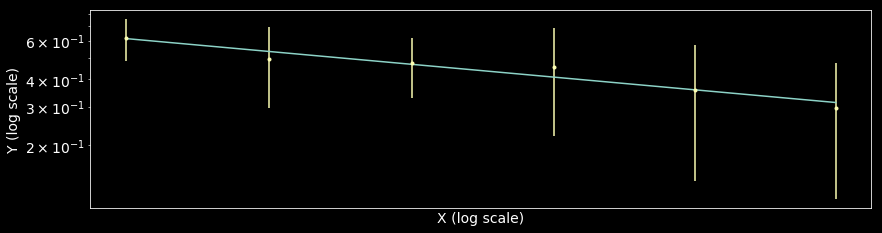

In [317]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print (pfinal)
print (covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

print('Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
print('Index = %5.2f +/- %5.2f' % (index, indexErr))

plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='r.')  # Data

plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.errorbar(xdata, ydata, yerr=yerr, fmt='.')  # Data
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
plt.show()

In [318]:
1/8

0.125

In [319]:
amp

3218525419.92783

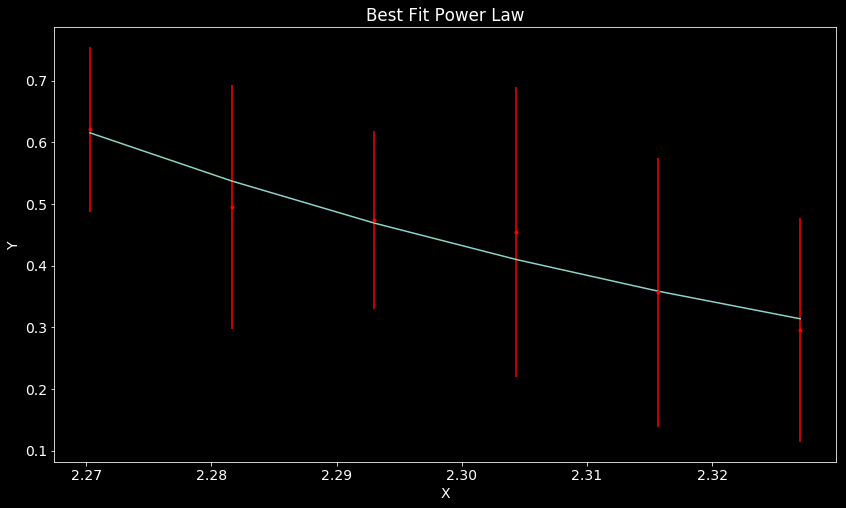

In [320]:
plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='r.')  # Data

plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()